In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv("Dataset .csv")

**Explore the dataset and identify the number
of rows and columns.**

In [ ]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
num_rows, num_cols = data.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')


Number of rows: 9551
Number of columns: 21


**Check for missing values in each column and
handle them accordingly.**

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


**Perform data type conversion if necessary.**

In [ ]:
print(data.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


**Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.**

In [ ]:
data['Has Table booking'] = data['Has Table booking'].astype(bool)
data['Has Online delivery'] = data['Has Online delivery'].astype(bool)
data['Is delivering now'] = data['Is delivering now'].astype(bool)
data['Switch to order menu'] = data['Switch to order menu'].astype(bool)

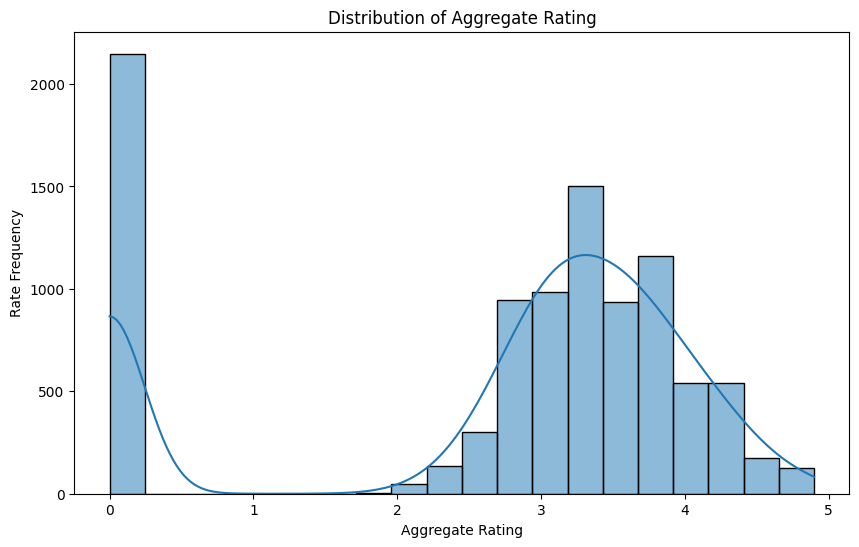

In [ ]:
data['Aggregate rating']= pd.to_numeric (data['Aggregate rating'], errors= 'coerce')
plt.figure(figsize= (10,6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Rate Frequency')
plt.show()

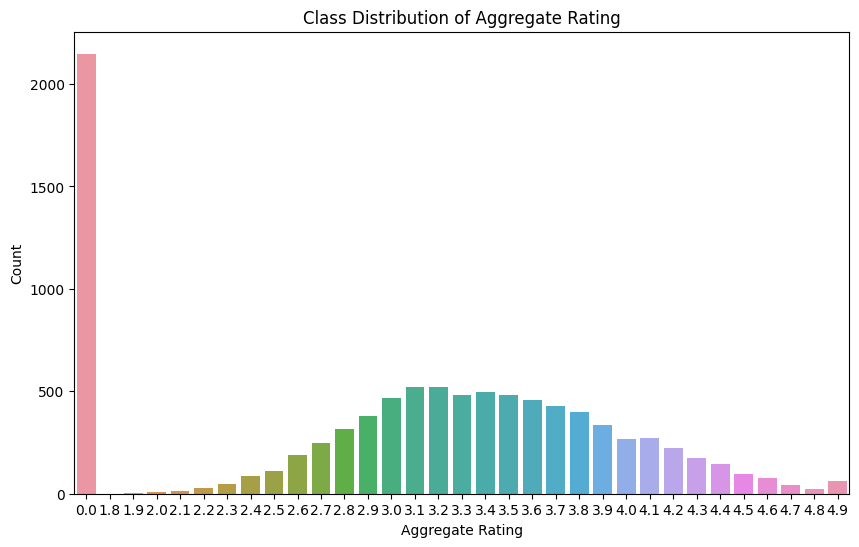

In [ ]:
class_counts = data['Aggregate rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


**Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.**

In [ ]:
numeric_statistics = data.describe()
print(numeric_statistics)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

**Explore the distribution of categorical
variables like "Country Code","City" and "Cuisines".**

In [ ]:
country_code_distribution = data['Country Code'].value_counts()

city_distribution = data['City'].value_counts()

cuisines_distribution = data['Cuisines'].value_counts()

print("Country Code Distribution:")
print(country_code_distribution)

print("\nCity Distribution:")
print(city_distribution)

print("\nCuisines Distribution:")
print(cuisines_distribution)


Country Code Distribution:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

City Distribution:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

Cuisines Distribution:
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                   

**Identify the top cuisines and cities with the
highest number of restaurants.**

In [ ]:
top_cuisines = data['Cuisines'].value_counts().head(10)

top_cities = data['City'].value_counts().head(10)

print("Top Cuisines:")
print(top_cuisines)

print("\nTop Cities:")
print(top_cities)

Top Cuisines:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

Top Cities:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


**Visualize the locations of restaurants on a
map using latitude and longitude
information.**

In [ ]:
pip install cartopy


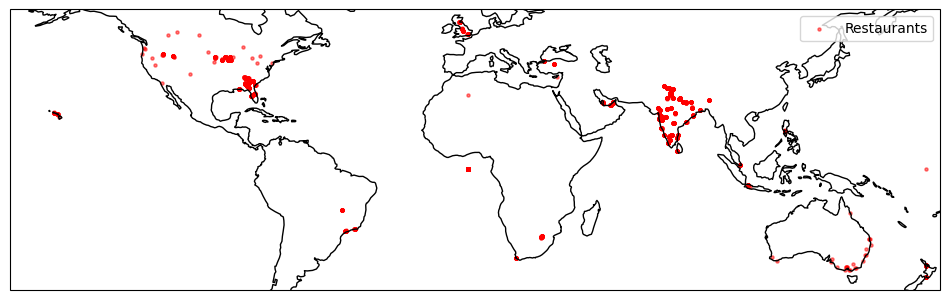

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

ax.scatter(data['Longitude'], data['Latitude'], color='red', s=5, alpha=0.5, label='Restaurants')

ax.legend()
plt.show()


**Analyze the distribution of restaurants
across different cities or countries.**

In [ ]:

city_distribution = data['City'].value_counts()
country_code_distribution = data['Country Code'].value_counts()

print("\nDistribution of Restaurants Across Country Codes:")
print(country_code_distribution)

print("  ")
print("  ")
print("Distribution of Restaurants Across Cities:")
print(city_distribution)



Distribution of Restaurants Across Country Codes:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
  
  
Distribution of Restaurants Across Cities:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


**Determine if there is any correlation
between the restaurant's location and its
rating.**

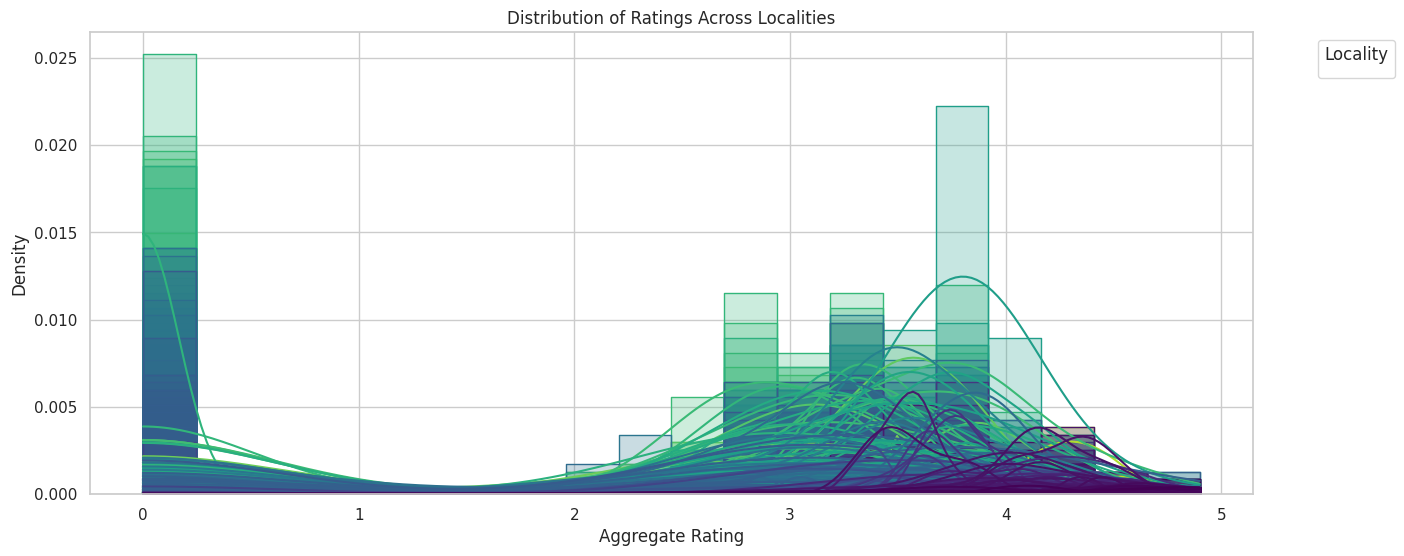

Summary Statistics for Ratings Across Localities:
                                 Locality      mean  median  count
0       ILD Trade Centre Mall, Sohna Road  3.050000    3.05      2
1     12th Square Building, Banjara Hills  4.300000    4.30      1
2                   A Hotel, Gurdev Nagar  3.600000    3.60      1
3                ARSS Mall, Paschim Vihar  3.100000    3.10      1
4                              Aaya Nagar  0.000000    0.00      1
...                                   ...       ...     ...    ...
1203             ibis New Delhi, Aerocity  1.550000    1.55      2
1204                              �ayyolu  4.300000    4.30      1
1205                         �guas Claras  3.666667    3.60      3
1206                           �ukurambar  3.400000    3.40      1
1207                            ��mitk�_y  4.200000    4.20      1

[1208 rows x 4 columns]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='Aggregate rating', bins=20, kde=True, hue='Locality', element="step", stat="density", palette='viridis')

plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings Across Localities')

plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

locality_stats = data.groupby('Locality')['Aggregate rating'].agg(['mean', 'median', 'count']).reset_index()

print("Summary Statistics for Ratings Across Localities:")
print(locality_stats)

